In [16]:
%pip install numpy pandas scikit-learn imbalanced-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [4]:
# Import dataset from CSV file
df = pd.read_csv('./telescope.csv')
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [5]:
# Encoding categorical class into numbers
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
df['class_encoded'] = encoder.fit_transform(df['class'])
print(df.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  class_encoded  
0  40.0920   81.8828     g              0  
1   6.3609  205.2610     g              0  
2  76.9600  256.7880     g              0  
3  10.4490  116.7370     g              0  
4   4.6480  356.4620     g              0  


In [6]:
# Scaling dataset so all features have zero mean and unit variance before training the model
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataFrame,oversampling = False):
    # Splitting features and target
    X = df.drop(['class','class_encoded'],axis=1) #Features
    y = df['class_encoded'] #Target

    # oversampling to prevent the model becoming biased towards majority calss
    if oversampling:
        ros = RandomOverSampler(random_state=42)
        X, y = ros.fit_resample(X, y)   
        
    scaler = StandardScaler()
    X_Scaled = scaler.fit_transform(X)
    data = np.hstack([X_Scaled, y.values.reshape(-1, 1)])
    return data,X_Scaled,y

data,X,y = scale_dataset(df)
print(data)


[[-0.57722602 -0.33680419 -0.38113037 ...  0.47681587 -1.49786555
   0.        ]
 [-0.51096889 -0.57002666 -0.64859479 ... -0.81541816  0.15312459
   0.        ]
 [ 2.56827756  6.20585836  2.61578306 ...  1.88922413  0.84263513
   0.        ]
 ...
 [ 0.52392318  1.38177927  1.31887687 ...  0.10163583  0.83900338
   1.        ]
 [ 1.58775746  2.98278123  2.47337518 ...  2.18525981  2.87032093
   1.        ]
 [ 3.16145936  1.67999288  0.81314905 ...  0.96101431  1.05044239
   1.        ]]


In [7]:
# Splitting dataset for training and testing in 8:2 proportion
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['class_encoded']
)
print(train_df)

        fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
12777   92.0485   7.3373  2.3962  0.5984  0.3313   94.5318  48.8574   -2.9613   
14238   17.0991  12.2582  2.6561  0.6424  0.5000    2.2429  -8.9509    9.2317   
3471    13.0804  10.9402  2.2000  0.7634  0.4385   14.2853  -4.9732   11.0286   
6270   103.6410  25.5476  3.1057  0.1944  0.1031 -170.9680  57.2744  -14.6201   
15123   52.4535  35.8114  3.1207  0.1404  0.1153   12.3676  -9.6380  -23.7440   
...         ...      ...     ...     ...     ...       ...      ...       ...   
18285   23.5193  14.4388  2.7176  0.5209  0.2872   -0.5528  26.1000   -5.3421   
13913   18.1068  10.3973  2.2866  0.7010  0.4061  -18.4090   2.8306  -10.0563   
1483    22.3115  18.1542  2.5711  0.3839  0.2349   24.2233  -8.7335  -13.1112   
3680   107.5960  24.3337  3.1460  0.2015  0.1025  -98.8176  83.1887  -20.3330   
5228    18.6490   7.4895  2.1508  0.7562  0.4841   -0.8756   5.0991    2.8894   

        fAlpha     fDist cl

In [8]:
train,X_train, y_train = scale_dataset(train_df,oversampling=True)
test,X_test, y_test = scale_dataset(test_df,oversampling=False)
print(train)


[[-0.60336006 -0.36365173 -0.4145058  ...  0.32367011 -1.47920825
   0.        ]
 [-0.54377274 -0.56622782 -0.67919672 ... -0.92551385  0.13674269
   0.        ]
 [ 2.22549952  5.31927851  2.55133089 ...  1.68902475  0.81161964
   0.        ]
 ...
 [-0.42835986 -0.22079359  0.06315243 ... -0.25938684  0.72165264
   1.        ]
 [ 1.0995202   1.40079994  0.21497278 ... -0.83450749  1.23638597
   1.        ]
 [ 0.12291146  0.13991931  1.29760892 ...  0.98199413 -2.10102314
   1.        ]]


In [9]:
# Debug
count_gamma = (y_train == 0).sum()
count_hadron = (y_train == 1).sum()
print("Number of records with with target gamma:", count_gamma)
print("Number of records with with target hadron:", count_hadron)


Number of records with with target gamma: 12332
Number of records with with target hadron: 12332


In [10]:
# K neearest neighbour classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 1 ... 1 1 1]


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9086225026288117

Confusion Matrix:
 [[11108  1224]
 [  514  6174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     12332
           1       0.83      0.92      0.88      6688

    accuracy                           0.91     19020
   macro avg       0.90      0.91      0.90     19020
weighted avg       0.91      0.91      0.91     19020



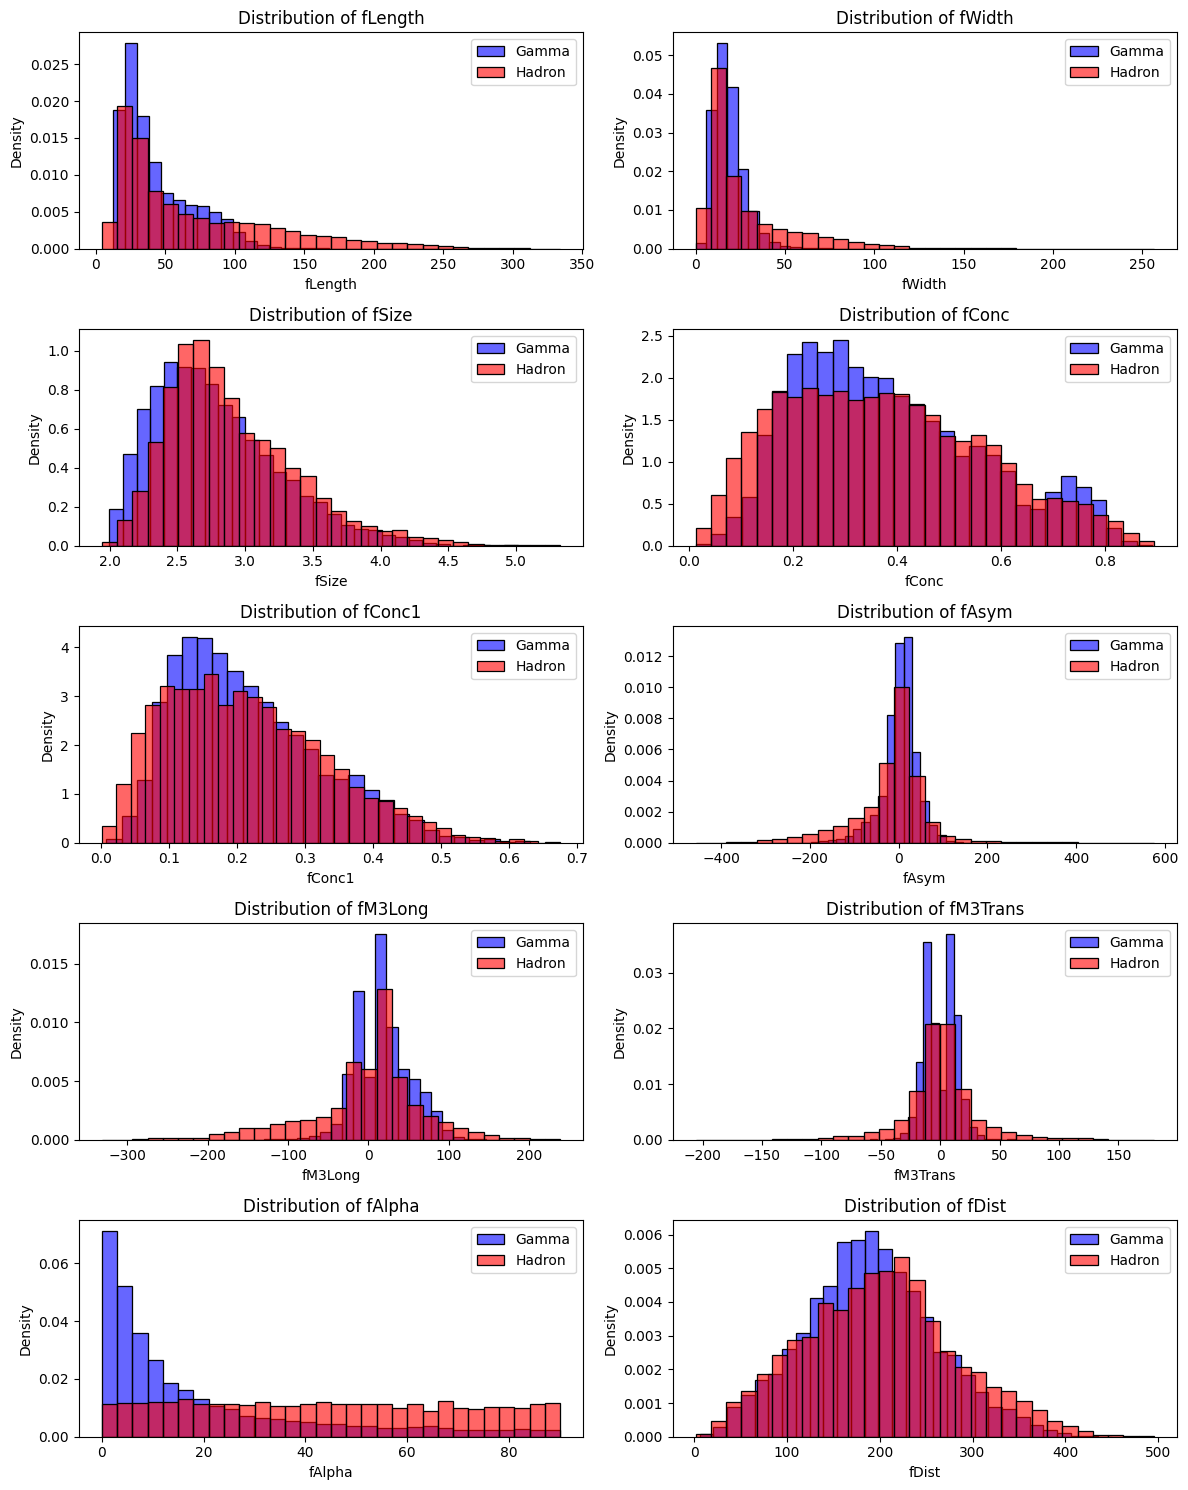

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# graph which represents how each feature influences the categorical output with blue color representing gamma and red representing hadron
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1','fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes = axes.ravel()

for i, feature in enumerate(features):
    # adjusting the heights of the bars so they are comparable on the same scale, regardless of how many total Gamma or Hadron samples[Normalizing]
    sns.histplot(df[df['class'] == 'g'][feature],
                 color='blue', label='Gamma', stat='density',
                 bins=30, alpha=0.6, ax=axes[i])
    
    sns.histplot(df[df['class'] == 'h'][feature],
                 color='red', label='Hadron', stat='density',
                 bins=30, alpha=0.6, ax=axes[i])
    
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].legend()
plt.tight_layout()
plt.show()


